In [ ]:
!nvidia-smi

Sun Jul 23 15:34:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Pip install method (recommended)

!pip install ultralytics -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 5.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 94.3MB/s]


## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Finetuning YOLOv8 model

In [ ]:
model.train(data = "/content/drive/MyDrive/final_data/data.yaml", epochs = 100, patience = 10, pretrained = True)

Ultralytics YOLOv8.0.97 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/final_data/data.yaml, epochs=100, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

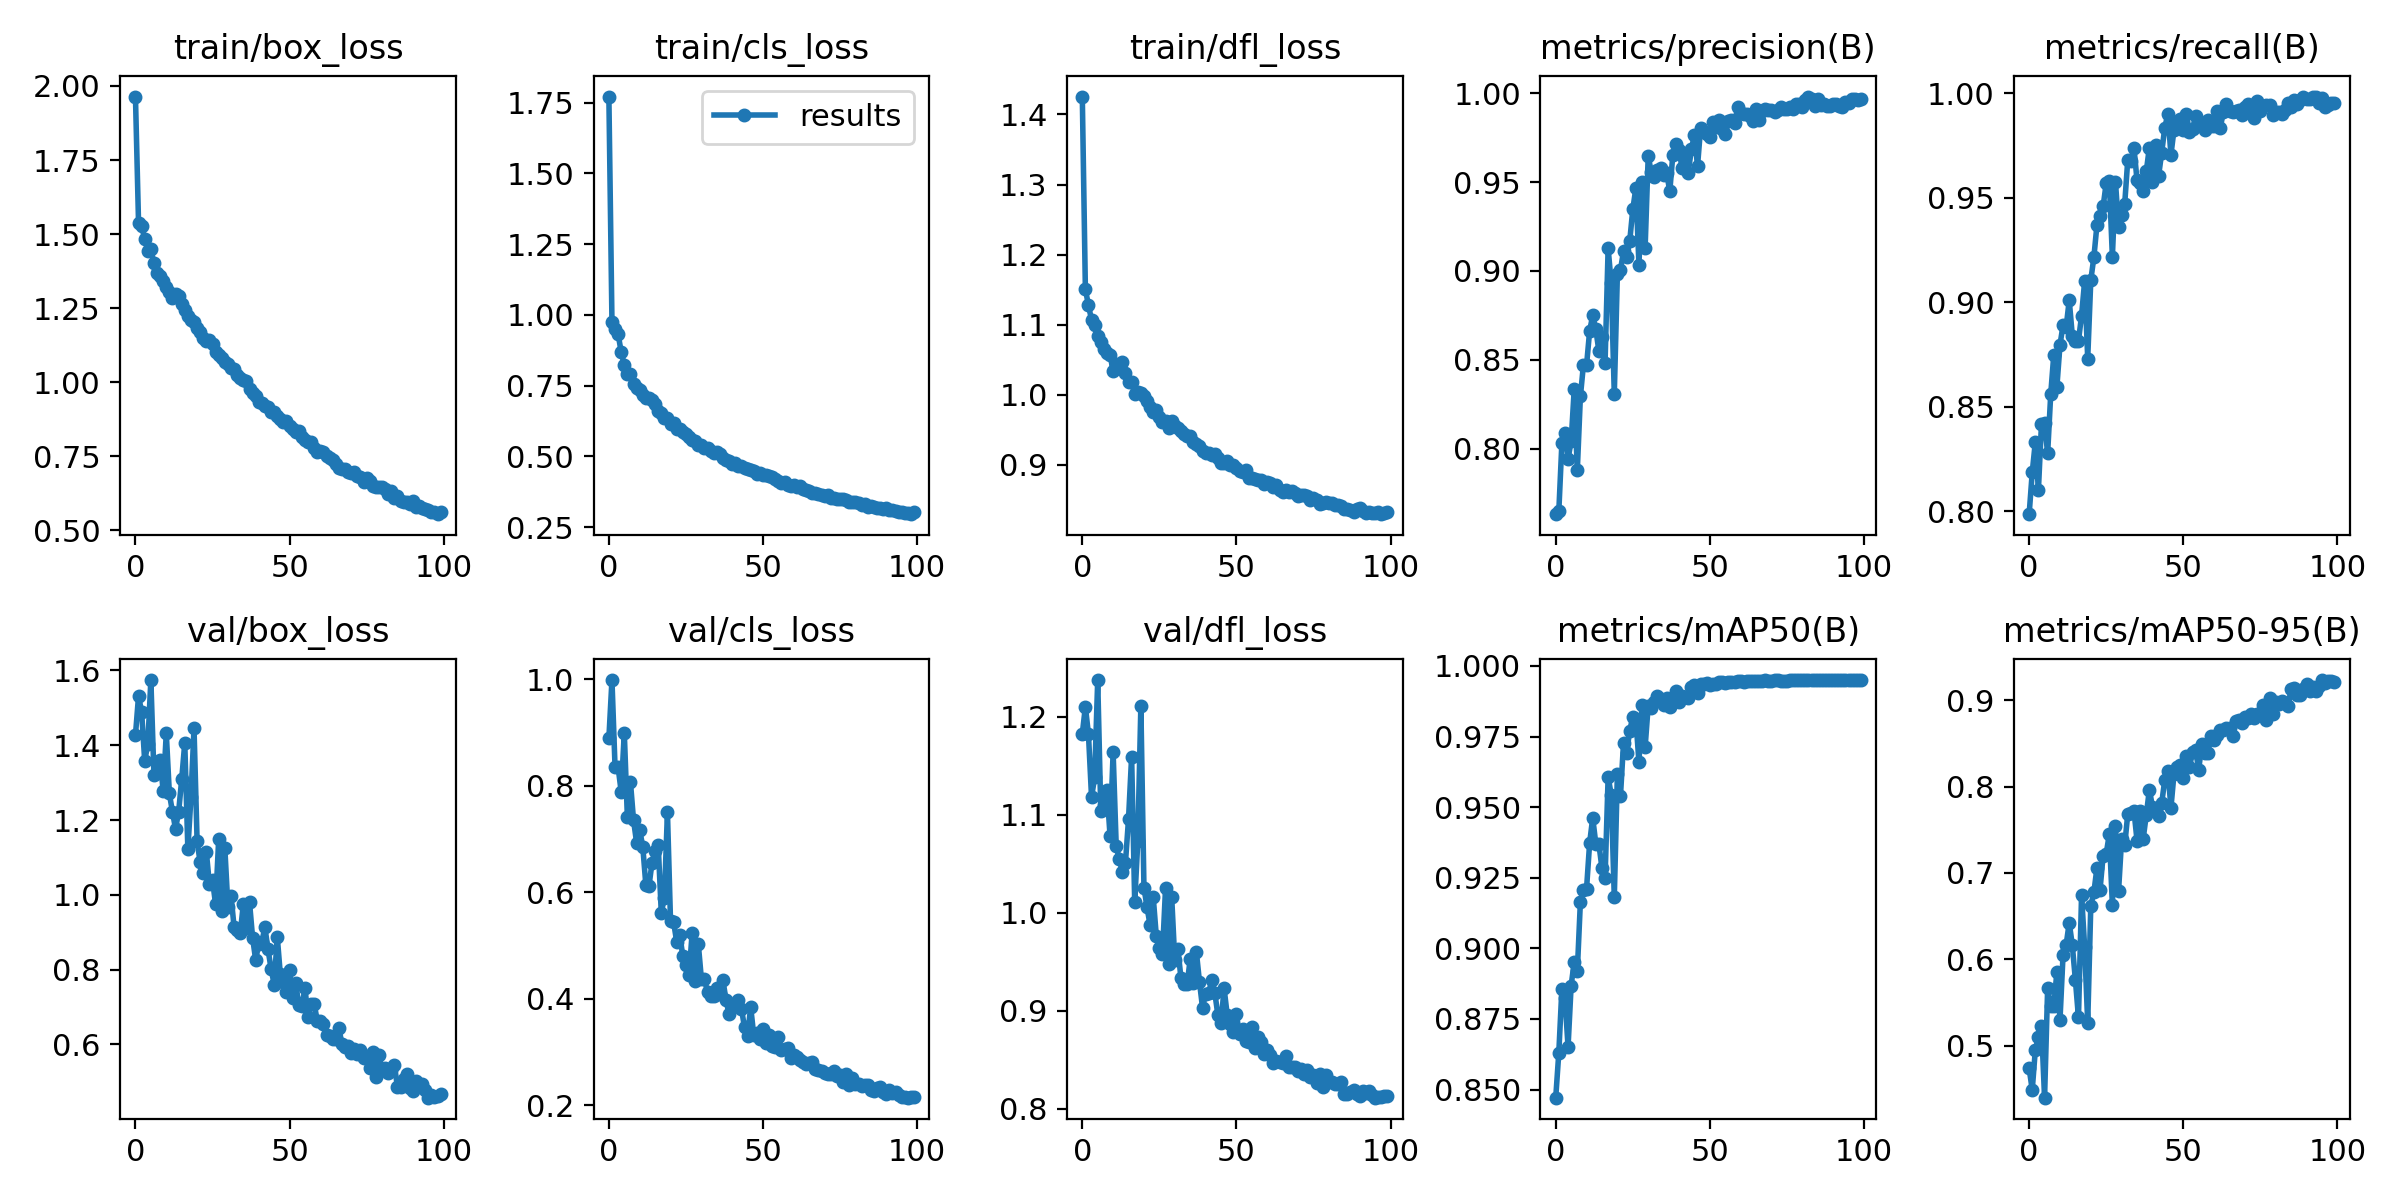

In [ ]:
from IPython.display import Image as im
im('/content/drive/MyDrive/final_data/runs/detect/train/results.png', width=600)

###Generating predictions on test images

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/final_data/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/final_data/data/test/images save=True

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

image 1/10 /content/drive/MyDrive/final_data/data/test/images/1336.jpg: 640x640 97 s, 37.0ms
image 2/10 /content/drive/MyDrive/final_data/data/test/images/1337.jpg: 640x640 70 s, 37.0ms
image 3/10 /content/drive/MyDrive/final_data/data/test/images/1338.jpg: 640x640 24 s, 37.0ms
image 4/10 /content/drive/MyDrive/final_data/data/test/images/1339.jpg: 640x640 23 s, 37.0ms
image 5/10 /content/drive/MyDrive/final_data/data/test/images/1340.jpg: 640x640 34 s, 37.1ms
image 6/10 /content/drive/MyDrive/final_data/data/test/images/1341.jpg: 640x640 35 s, 37.0ms
image 7/10 /content/drive/MyDrive/final_data/data/test/images/1342.jpg: 640x640 47 s, 37.0ms
image 8/10 /content/drive/MyDrive/final_data/data/test/images/1343.jpg: 640x640 43 s, 37.0ms
image 9/10 /content/drive/MyDrive/final_data/data/test/images/1344.jpg: 640x640 63 s, 37.0ms
image 1

### Plot results

/content


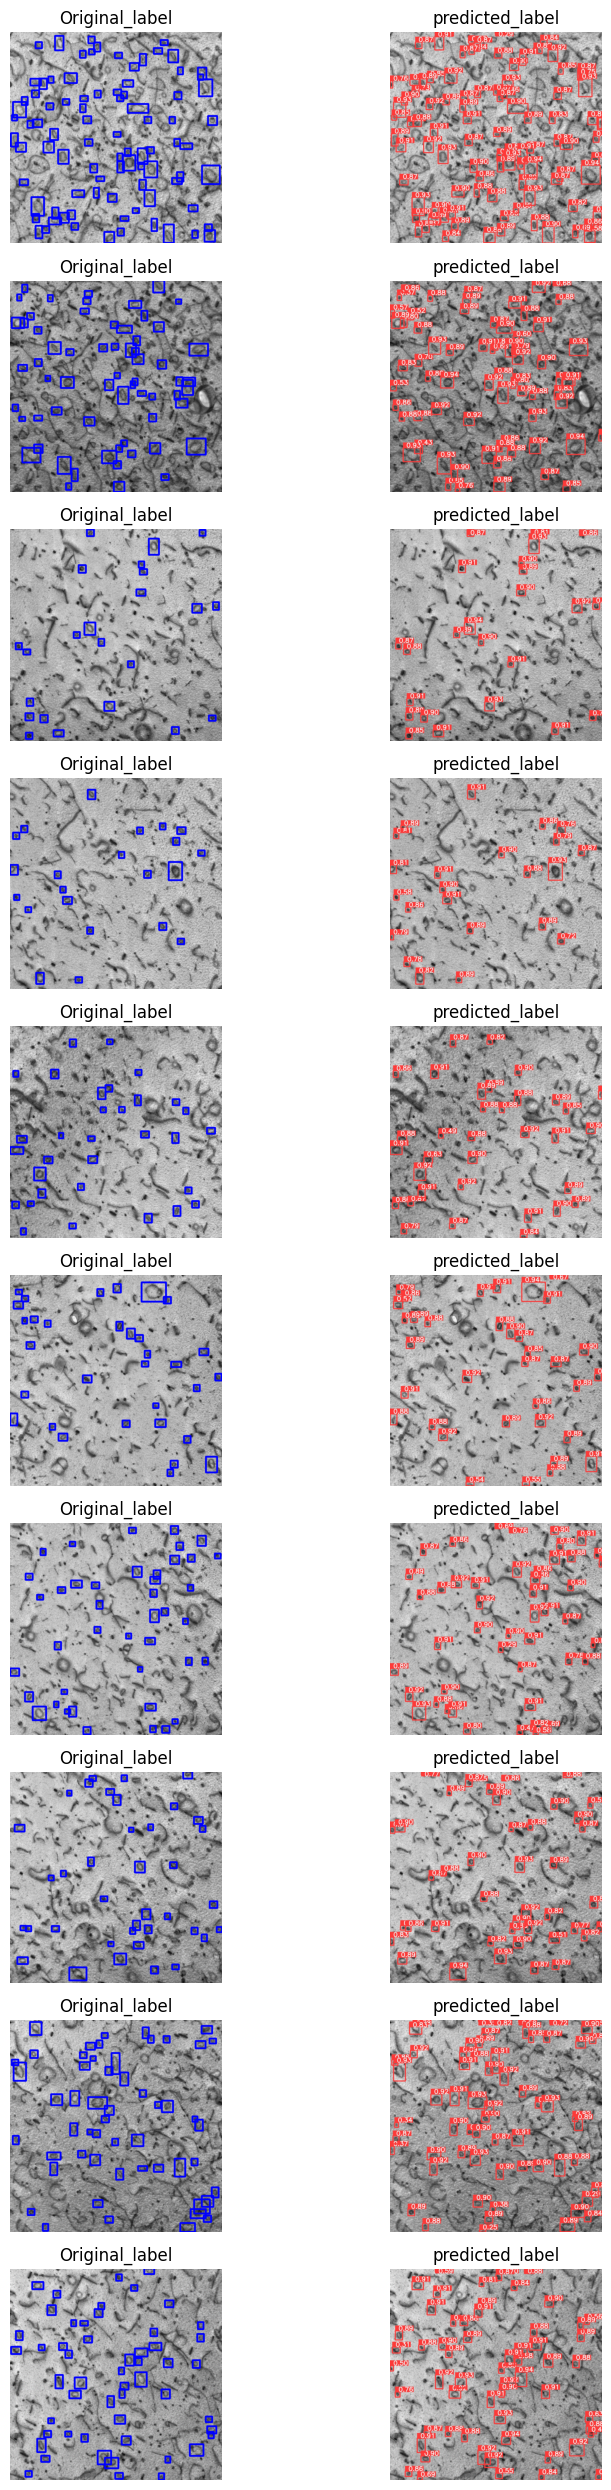

In [ ]:
import numpy as np
from natsort import natsorted
import random
from glob import glob
import matplotlib.pyplot as plt
import cv2
import os


def plot_box_from_yolo(img_path, bbox_path):
  img = cv2.imread(img_path)
  dh, dw, _ = img.shape
  result = img.copy()
  file1 = open(bbox_path, 'r')
  Lines = file1.readlines()
  width = 7*(img.shape[0]//1200+1)
  for line in Lines:
      a = line.split()
      lab = int(a[0])
      x_cent = int(float(a[1])*dw)
      y_cent = int(float(a[2])*dh)
      w = int(float(a[3])*dw)
      h = int(float(a[4])*dh)
      x = x_cent-w//2
      y = y_cent-h//2
      cv2.rectangle(result,
       (x, y), (x+w, y+h),
        color=(255,0,0),
        thickness=width)
  return result



def plot_test_images(image_paths, label_paths, predicted_images_path, num_samples):
  all_predicted_images = natsorted(glob(predicted_images_path))

  all_images = natsorted(glob(image_paths))
  all_paths = natsorted(glob(label_paths))
  num_images = len(all_paths)
  plt.figure(figsize=(10,25))
  for i in range(0, num_samples*2, 2):
    j = i//2

    result_image = plot_box_from_yolo(all_images[j], all_paths[j])
    plt.subplot(num_samples, 2, i+1)
    plt.imshow(result_image[:, :, ::-1])
    plt.title("Original_label")
    plt.axis('off')

    plt.subplot(num_samples, 2, i+2)
    pred_img = cv2.imread(all_predicted_images[j])
    plt.imshow(pred_img[:, :, ::-1])
    plt.title("predicted_label")
    plt.axis('off')
  plt.subplots_adjust(wspace=0)
  plt.tight_layout()
  plt.show()


plot_test_images('/content/drive/MyDrive/final_data/data/test/images/*', '/content/drive/MyDrive/final_data/data/test/labels/*', '/content/drive/MyDrive/final_data/runs/detect/predict3/*', 10)